In [1]:
'''
Steps -
1. Read and explore the given dataset. ( Rename column/add headers, plot histograms,find data characteristics)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )
3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
4. Build Popularity Recommender model.
5. Build Collaborative Filtering model.
6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can
also use a different method to evaluate the models.
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.
8. Summarise your insights.
'''

'\nSteps -\n1. Read and explore the given dataset. ( Rename column/add headers, plot histograms,find data characteristics)\n2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )\n3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)\n4. Build Popularity Recommender model.\n5. Build Collaborative Filtering model.\n6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can\nalso use a different method to evaluate the models.\n7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.\n8. Summarise your insights.\n'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from datetime import datetime
import time

In [0]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_raw = pd.read_csv('/content/drive/My Drive/ratings_Electronics.csv',names=['userId', 'productId','ratings','timestamp'])

In [6]:
df_raw.shape

(7824482, 4)

In [7]:
ratings_Electronics_200K = df_raw.head(200000)
ratings_Electronics_200K.shape

(200000, 4)

In [0]:
df = ratings_Electronics_200K.copy(deep=True)

In [9]:
df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [0]:
df.drop(columns=['timestamp'],inplace=True)

In [11]:
df.head(4)

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0


In [12]:
df.shape

(200000, 3)

In [0]:
####################################################  EDA ##################################################

In [0]:
# Number of ratings per book
data = df.groupby('productId')['ratings'].count().clip(upper=50)# Number of ratings per book
data = df.groupby('productId')['ratings'].count().clip(upper=50)

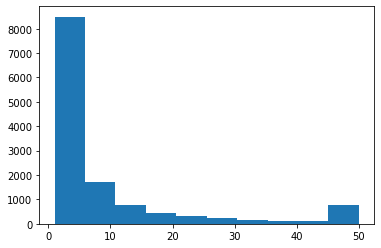

In [15]:

# Create trace
trace = plt.hist(x = data.values)

In [0]:

# Number of ratings per book
data = df.groupby('userId')['productId'].count().clip(upper=50)

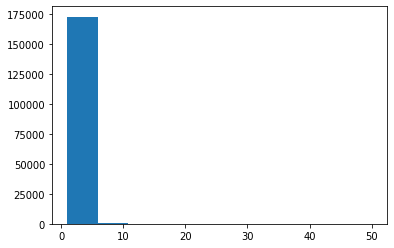

In [17]:

# Create trace
trace = plt.hist(x = data.values)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
userId       200000 non-null object
productId    200000 non-null object
ratings      200000 non-null float64
dtypes: float64(1), object(2)
memory usage: 4.6+ MB


In [19]:
df.shape[0]

200000

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ratings,200000.0,4.013895,1.373682,1.0,3.0,5.0,5.0,5.0


In [21]:
df.isnull().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [22]:
print(df['userId'].nunique())

173349


In [23]:
print(df['productId'].nunique())

13131


In [0]:

 ##                          P O P U L A R I T Y                  B A S E D                           R E C O M E N D A T I O N 


In [0]:
product_unique_count = df.productId.value_counts().to_frame()

In [0]:
product_unique_count.reset_index(inplace=True)


In [26]:
product_unique_count.head(5)

,index,productId
0,B00004ZCJE,2547
1,B00001P4ZH,2075
2,B000065BP9,1714
3,B00004T8R2,1692
4,B00001WRSJ,1586


In [0]:
##### We want to know which pruduct are sold most as sold_count

In [0]:
product_unique_count.rename(columns={'index':'productId','productId':'sold_count'},inplace=True)

In [0]:
product_unique_count = product_unique_count.sort_values(by='productId',ascending=False)

In [30]:
product_unique_count.head()

,productId,sold_count
60,B00006JN3G,389
2349,B00006JN2R,14
6359,B00006JM74,3
8954,B00006JM73,2
7382,B00006JM72,3


In [31]:
product_unique_count.sold_count.sum()

200000

In [0]:
####################### CHECKING FOR THE AVERAGE RATINGS ###################################

In [33]:
product_unique_count[(product_unique_count.sold_count==7)==True]

,productId,sold_count
3964,B00006JJPP,7
3926,B00006JHYW,7
3819,B00006JBKN,7
3921,B00006J09F,7
3870,B00006IS63,7
...,...,...
3900,9985558065,7
4009,9981724742,7
4058,9876050621,7
3700,6000008775,7


In [0]:
##     CHECKING ANY ONE PRODUCT SOLD COUNT = 7 and ratings

In [35]:
df[(df['productId']=='9985558065')==True]

,userId,productId,ratings
6879,A3P1UWQ4NWEYMX,9985558065,2.0
6880,A36HT2ITEIAJXQ,9985558065,5.0
6881,AGSXTHPNGNA16,9985558065,5.0
6882,A3G37IM6Z8ZNB4,9985558065,5.0
6883,A1NUHPQ47DKGW7,9985558065,5.0
6884,A2Z123EZCA9177,9985558065,5.0
6885,AX2O4I0TZ7STS,9985558065,5.0


In [0]:
#################  Calculating the average product ratings ######################################################

In [0]:
product_avg_ratings = np.round(df.groupby(df['productId'])['ratings'].sum()/df.groupby(df['productId'])['ratings'].count())

In [0]:
product_avg_ratings = product_avg_ratings.to_frame().reset_index()

In [39]:
product_avg_ratings.head(5)

,productId,ratings
0,0132793040,5.0
1,0321732944,5.0
2,0439886341,2.0
3,0511189877,4.0
4,0528881469,3.0


In [40]:
product_avg_ratings = product_avg_ratings.sort_values(by='productId',ascending=False)
product_avg_ratings.head(4)

,productId,ratings
13130,B00006JN3G,4.0
13129,B00006JN2R,4.0
13128,B00006JM74,1.0
13127,B00006JM73,4.0


In [41]:
product_avg_ratings[(product_avg_ratings['productId']=='9985558065')==True]

,productId,ratings
915,9985558065,5.0


In [0]:
product_recommend_pop = pd.merge(product_unique_count,product_avg_ratings, on='productId',how='inner')

In [43]:
product_recommend_pop.head()

,productId,sold_count,ratings
0,B00006JN3G,389,4.0
1,B00006JN2R,14,4.0
2,B00006JM74,3,1.0
3,B00006JM73,2,4.0
4,B00006JM72,3,2.0


In [0]:
################## Recommending the product with average rating as 5 and sold maximum ############################

In [45]:
product_recommend_pop.sort_values(by=['ratings','sold_count'],ascending=False).head(5)

,productId,sold_count,ratings
10882,B00001WRSJ,1586,5.0
5026,B00005T3G0,1287,5.0
6042,B00005LEN4,1107,5.0
5689,B00005NIMJ,884,5.0
8465,B00004Z5M1,815,5.0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df1 = df.groupby('userId').count()

In [0]:
df1.reset_index(inplace=True)

In [49]:
df1.head()

,userId,productId,ratings
0,A001944026UMZ8T3K5QH1,1,1
1,A00570163ATHRHPDG3GKN,1,1
2,A00625243BI8W1SSZNLMD,1,1
3,A00766851QZZUBOVF4JFT,1,1
4,A00995931BE16NG4F52QC,1,1


In [50]:
print(df1.shape)
print(df1['userId'].nunique())

(173349, 3)
173349


In [0]:

## Identifying the users  who rated more than and equal to 50 products

In [0]:
df_user_10 = df1[(df1['productId']>=10)==True].reset_index()

In [53]:
df_user_10.shape

(177, 4)

In [0]:
df_user_10_ratings = pd.DataFrame.merge(df,df_user_10,on='userId',how='inner',sort=True)

In [55]:
print(df_user_10_ratings.shape)
print(df_user_10_ratings['userId'].nunique())

(3187, 6)
177


In [56]:
df_user_10_ratings.head(3)

,userId,productId_x,ratings_x,index,productId_y,ratings_y
0,A10C84Y38RT22P,B000023VUL,5.0,518,13,13
1,A10C84Y38RT22P,B00003CW9Q,5.0,518,13,13
2,A10C84Y38RT22P,B00003CWBX,5.0,518,13,13


In [0]:
df_user_10_ratings.drop(columns=['productId_y','ratings_y','index'],inplace=True)

In [58]:
df_user_10_ratings.head(3)

,userId,productId_x,ratings_x
0,A10C84Y38RT22P,B000023VUL,5.0
1,A10C84Y38RT22P,B00003CW9Q,5.0
2,A10C84Y38RT22P,B00003CWBX,5.0


In [59]:
print(df_user_10_ratings['userId'].nunique())

177


In [60]:
print(df_user_10_ratings['productId_x'].nunique())

2092


In [0]:
####################################################  INSTALLING THE SURPRISE LIBRARY #################################################

In [62]:
pip install surprise

     |████████████████████████████████| 6.5MB 3.5MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678243 sha256=5d52a65177b6857ba4f68679dec855bbfd301169bf9db5565844b76e18fde490
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [63]:
'''
                          C o l l a b                  B A S E D                           R E C O M E N D A T I O N 
'''

'\n                          C o l l a b                  B A S E D                           R E C O M E N D A T I O N \n'

In [0]:
#################################################################### RECOMMENDATION ALGORITHM ##################################################################

In [0]:
## Use user_based true/false to switch between user-based or item-based collaborative filtering

from surprise import KNNWithMeans,Reader,Dataset,SVD,SVDpp,SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV,cross_validate

In [0]:

from surprise.model_selection.validation import cross_validate
from surprise.model_selection.search import GridSearchCV 

In [0]:
bsl_options = {'method': 'als',
               'learning_rate': .00005,
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }

In [0]:
MLA =[   KNNBasic()
        ,SVD()
      , SVDpp()
      , SlopeOne()
      , NMF()
      , NormalPredictor()
      ,KNNWithZScore()
      , KNNBaseline()
      , BaselineOnly()
      , CoClustering()
     ,KNNWithMeans(k=5, bsl_options=bsl_options,sim_options={'name': 'cosine','user_based': True})
     ,KNNWithMeans(k=5, sim_options={'name': 'cosine','user_based': False}) 
     ,KNNWithMeans(k=5, bsl_options=bsl_options,sim_options={'name': 'pearson_baseline','shrinkage': 0  , 'user_based': False}) 
      ,KNNWithMeans(k=5, bsl_options=bsl_options,sim_options={'name': 'pearson_baseline','shrinkage': 0  , 'user_based': True}) 
]

In [69]:
print(df.head(4))
print(df.shape)

           userId   productId  ratings
0   AKM1MP6P0OYPR  0132793040      5.0
1  A2CX7LUOHB2NDG  0321732944      5.0
2  A2NWSAGRHCP8N5  0439886341      1.0
3  A2WNBOD3WNDNKT  0439886341      3.0
(200000, 3)


In [0]:
data_recomm_raw = df_user_10_ratings.copy(deep=True)

In [71]:
data_recomm = data_recomm_raw.rename(columns={'userId':'uid','productId_x':'iid','ratings_x':'rating'})
data_recomm.head()

,uid,iid,rating
0,A10C84Y38RT22P,B000023VUL,5.0
1,A10C84Y38RT22P,B00003CW9Q,5.0
2,A10C84Y38RT22P,B00003CWBX,5.0
3,A10C84Y38RT22P,B00004RBR6,5.0
4,A10C84Y38RT22P,B00004Z5A5,4.0


In [0]:
############################### MATRIX FACTORIZATION BASED REDOMMENDATIONS #######################

In [0]:
data_recom_mat = data_recomm.copy(deep=True)

In [0]:
reader = Reader(rating_scale=(1,5))
data_recom_mat_reader = Dataset.load_from_df(data_recom_mat, reader)

In [0]:
param_grid = {'lr_all':[.001,.01],'reg_all':[0.1,0.5]}

In [0]:
gs = GridSearchCV(SVDpp,param_grid,cv=3)

In [0]:
gs.fit(data_recom_mat_reader)

In [78]:
print(gs.best_params['mae'])

{'lr_all': 0.01, 'reg_all': 0.1}


In [79]:
print(gs.best_params['rmse'])

{'lr_all': 0.01, 'reg_all': 0.5}


In [80]:
benchmark = []
# Iterate over all algorithms
for algorithm in MLA:
    # Perform cross validation
    results = cross_validate(algorithm, data_recom_mat_reader , cv=10, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVD,1.006040,0.755627,0.184034,0.002495
BaselineOnly,1.006772,0.765564,0.007813,0.001700
SVDpp,1.008800,0.749677,1.412097,0.009424
KNNWithMeans,1.053471,0.791651,0.009103,0.003193
KNNBaseline,1.057756,0.778046,0.009173,0.003454
KNNWithMeans,1.075866,0.804466,0.006316,0.003723
KNNWithZScore,1.085930,0.807261,0.011918,0.003819
SlopeOne,1.101901,0.824963,0.099108,0.005037
KNNBasic,1.123505,0.830128,0.001728,0.003538


In [0]:
## we see that SVDpp has minimum RMSE  so building the model on same 

In [0]:
trainset_mat = data_recom_mat_reader.build_full_trainset()

In [83]:
trainset_mat.ur[1][1]

(14, 1.0)

In [84]:
algo = SVDpp()
algo.fit(trainset_mat)

In [85]:
predict = algo.predict(uid='A00038802J7X43YTW44TD',iid= 'B0000645RH')
score=predict.est
print(score)

4.262629432067776


In [0]:
# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset_mat = trainset_mat.build_anti_testset()

In [87]:
testset_mat[9:23]

[('A10C84Y38RT22P', 'B00004TZK6', 4.262629432067776),
 ('A10C84Y38RT22P', 'B00004Z0BN', 4.262629432067776),
 ('A10C84Y38RT22P', 'B00004Z0C2', 4.262629432067776),
 ('A10C84Y38RT22P', 'B00004Z672', 4.262629432067776),
 ('A10C84Y38RT22P', 'B000059L44', 4.262629432067776),
 ('A10C84Y38RT22P', 'B00005B8SF', 4.262629432067776),
 ('A10C84Y38RT22P', 'B00005B9W6', 4.262629432067776),
 ('A10C84Y38RT22P', 'B00005QBUR', 4.262629432067776),
 ('A10C84Y38RT22P', 'B00005QBUU', 4.262629432067776),
 ('A10C84Y38RT22P', 'B00005QT5J', 4.262629432067776),
 ('A10C84Y38RT22P', 'B00005T39Y', 4.262629432067776),
 ('A10C84Y38RT22P', 'B00005T3SP', 4.262629432067776),
 ('A10C84Y38RT22P', 'B00005V54U', 4.262629432067776),
 ('A10C84Y38RT22P', 'B000060OEO', 4.262629432067776)]

In [0]:
predictions_mat = algo.test(testset_mat)

In [89]:
predictions_mat[:9]

[Prediction(uid='A10C84Y38RT22P', iid='B000001OMN', r_ui=4.262629432067776, est=4.046859001665824, details={'was_impossible': False}),
 Prediction(uid='A10C84Y38RT22P', iid='B00000J1G6', r_ui=4.262629432067776, est=3.723717665281609, details={'was_impossible': False}),
 Prediction(uid='A10C84Y38RT22P', iid='B00000J9Z7', r_ui=4.262629432067776, est=4.309784754799142, details={'was_impossible': False}),
 Prediction(uid='A10C84Y38RT22P', iid='B00000JBYW', r_ui=4.262629432067776, est=3.6021651223330626, details={'was_impossible': False}),
 Prediction(uid='A10C84Y38RT22P', iid='B00000JCTD', r_ui=4.262629432067776, est=4.285002191448045, details={'was_impossible': False}),
 Prediction(uid='A10C84Y38RT22P', iid='B00001P3XM', r_ui=4.262629432067776, est=4.172571949859146, details={'was_impossible': False}),
 Prediction(uid='A10C84Y38RT22P', iid='B00001W0D4', r_ui=4.262629432067776, est=4.253347047690503, details={'was_impossible': False}),
 Prediction(uid='A10C84Y38RT22P', iid='B00001ZWRV', r_

In [0]:
from surprise import accuracy

In [91]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(predictions_mat, verbose=True)

User-based Model : Test Set
RMSE: 0.4014


0.4013974860307046

In [92]:
for uid, iid, r_ui, est, _ in predictions_mat[:9]:
  print(uid, iid, r_ui, est, _)

A10C84Y38RT22P B000001OMN 4.262629432067776 4.046859001665824 {'was_impossible': False}
A10C84Y38RT22P B00000J1G6 4.262629432067776 3.723717665281609 {'was_impossible': False}
A10C84Y38RT22P B00000J9Z7 4.262629432067776 4.309784754799142 {'was_impossible': False}
A10C84Y38RT22P B00000JBYW 4.262629432067776 3.6021651223330626 {'was_impossible': False}
A10C84Y38RT22P B00000JCTD 4.262629432067776 4.285002191448045 {'was_impossible': False}
A10C84Y38RT22P B00001P3XM 4.262629432067776 4.172571949859146 {'was_impossible': False}
A10C84Y38RT22P B00001W0D4 4.262629432067776 4.253347047690503 {'was_impossible': False}
A10C84Y38RT22P B00001ZWRV 4.262629432067776 4.177548644778244 {'was_impossible': False}
A10C84Y38RT22P B00004T8R2 4.262629432067776 3.8764219541131215 {'was_impossible': False}


In [0]:
def get_top_n(predictions,userid, n=5):
  # First map the predictions to each user.
  from collections import defaultdict
  top_n =  defaultdict(list)
  for uid, iid, r_ui, est, _ in predictions:
     ## we can use r_ui also instead of true_r and we used _ to resolve error "too many values to unpack (expected 4)"
     ###  ## A00038802J7X43YTW44TD B0000645RH 4.446808510638298 4.07584978867076 {'was_impossible': False}
     top_n[uid].append((iid, est)) ##  {'A00038802J7X43YTW44TD': [('B0000645RH', 4.07584978867076),('B00066IJPQ', 4.3932911625590245),('B0000C4DVM', 4.051358159687522)],...

        # Then sort the predictions for each user and retrieve the k highest ones.
        # for uid, user_ratings in top_n.items():
     userid_list = top_n[userid]
     userid_list.sort(key=lambda x: x[1], reverse=True)
        # L = [(1,2), (2,3), (4,5), (3,4), (6,7), (6,7), (3,8)]
        #[x[1] for x in L]
     items_sorted_list = [x[0] for x in userid_list]
     top_n_recomm =[]
     top_n_recomm = items_sorted_list[:n]
  return 'Top {} recommended Items are -  {}'.format(n,top_n_recomm)

In [94]:
top_n = get_top_n(predictions_mat,'A10C84Y38RT22P', n=10)
top_n

"Top 10 recommended Items are -  ['B00004WHF9', 'B00006HZ0L', 'B000031KIM', 'B00005Q5U5', 'B00004Z5M1', 'B00000JHVP', 'B00000J4FS', 'B00006B7HB', 'B00005ICE3', 'B00004Y7CF']"

In [0]:
############################################################### USER-USER RECOMMENDATION ####################################################################################

In [0]:

from surprise.model_selection import train_test_split

In [0]:
reader = Reader(rating_scale=(1,5))
dataset_reader = Dataset.load_from_df(data_recom_mat, reader)

In [0]:
trainset_70, testset_30 = train_test_split(dataset_reader, test_size=.3)

In [99]:
MLA_columns = ['MLA_Name']
MLA_compare_user = pd.DataFrame(columns = MLA_columns)
MLA_compare_user

,MLA_Name


In [0]:
MLA_user =[   KNNBasic()
        ,SVD()
      , SVDpp()
      , SlopeOne()
      , NMF()
      , NormalPredictor()
      ,KNNWithZScore()
      , KNNBaseline()
      , BaselineOnly()
      , CoClustering()
     ,KNNWithMeans(k=5, bsl_options=bsl_options,sim_options={'name': 'cosine','user_based': True})
     ,KNNWithMeans(k=5, bsl_options=bsl_options,sim_options={'name': 'pearson_baseline','shrinkage': 0  , 'user_based': True}) 
]

In [101]:
row_index = 0
for alg in MLA_user:
    
    from datetime import datetime
    import time

    #set name and parameters
    #print(alg.__class__.__name__)
    MLA_compare_user.loc[row_index, 'MLA_Name'] = alg.__class__.__name__
    #print(str(alg.get_params()))
   # Use user_based true/false to switch between user-based or item-based collaborative filtering
    algo = alg
    algo.fit(trainset_70)
    test_pred = algo.test(testset_30)
    MLA_compare_user.loc[row_index, 'RMSE'] =  accuracy.rmse(test_pred, verbose=True)
    MLA_compare_user.loc[row_index, 'Timestamp'] = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
      
    row_index+=1
 

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0658
RMSE: 0.9840
RMSE: 0.9829
RMSE: 1.0509
RMSE: 1.1399
RMSE: 1.3401
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0442
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0078
Estimating biases using als...
RMSE: 0.9891
RMSE: 1.0743
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0331
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0323


In [102]:
MLA_compare_user

,MLA_Name,RMSE,Timestamp
0,KNNBasic,1.065833,2019-11-22 05:19:09
1,SVD,0.983984,2019-11-22 05:19:09
2,SVDpp,0.982897,2019-11-22 05:19:10
3,SlopeOne,1.050913,2019-11-22 05:19:10
4,NMF,1.139885,2019-11-22 05:19:10
5,NormalPredictor,1.340074,2019-11-22 05:19:10
6,KNNWithZScore,1.044199,2019-11-22 05:19:10
7,KNNBaseline,1.007778,2019-11-22 05:19:10
8,BaselineOnly,0.989079,2019-11-22 05:19:10
9,CoClustering,1.074277,2019-11-22 05:19:10


In [103]:
fmt = '%Y-%m-%d %H:%M:%S'
max_tstmp = datetime.strptime(MLA_compare_user['Timestamp'].max(), fmt)
min_tstmp = datetime.strptime(MLA_compare_user['Timestamp'].min(), fmt)


td = max_tstmp - min_tstmp
td_mins = int(round(td.total_seconds() / 60))

print('The model performance is approx. %s minutes' % td_mins)

The model performance is approx. 0 minutes


In [0]:
MLA_compare_user.sort_values(by='RMSE',ascending=True,inplace=True)

In [0]:
############################################################### ITEM - ITEM RECOMMENDATION ##################################

In [0]:

from surprise.model_selection import train_test_split

In [0]:

reader = Reader(rating_scale=(1,5))
dataset_reader = Dataset.load_from_df(data_recom_mat, reader)

In [0]:
trainset_70, testset_30 = train_test_split(dataset_reader, test_size=.3)

In [109]:
MLA_columns = ['MLA_Name']
MLA_compare_item = pd.DataFrame(columns = MLA_columns)
MLA_compare_item

,MLA_Name


In [0]:
MLA_item =[   KNNBasic()
        ,SVD()
      , SVDpp()
      , SlopeOne()
      , NMF()
      , NormalPredictor()
      ,KNNWithZScore()
      , KNNBaseline()
      , BaselineOnly()
      , CoClustering()
     ,KNNWithMeans(k=5, bsl_options=bsl_options,sim_options={'name': 'cosine','user_based': False})
     ,KNNWithMeans(k=5, bsl_options=bsl_options,sim_options={'name': 'pearson_baseline','shrinkage': 0  , 'user_based': False}) 
]

In [111]:
row_index = 0
for alg in MLA_item:
    
    from datetime import datetime
    import time

    #set name and parameters
    #print(alg.__class__.__name__)
    MLA_compare_item.loc[row_index, 'MLA_Name'] = alg.__class__.__name__
    #print(str(alg.get_params()))
   # Use user_based true/false to switch between user-based or item-based collaborative filtering
    algo = alg
    algo.fit(trainset_70)
    test_pred = algo.test(testset_30)
    MLA_compare_item.loc[row_index, 'RMSE'] =  accuracy.rmse(test_pred, verbose=True)
    MLA_compare_item.loc[row_index, 'Timestamp'] = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
      
    row_index+=1
 

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0987
RMSE: 1.0167
RMSE: 1.0200
RMSE: 1.0715
RMSE: 1.2128
RMSE: 1.3629
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0674
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0519
Estimating biases using als...
RMSE: 1.0161
RMSE: 1.1449
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1653
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1773


In [112]:
MLA_compare_item

,MLA_Name,RMSE,Timestamp
0,KNNBasic,1.098682,2019-11-22 05:19:32
1,SVD,1.016742,2019-11-22 05:19:32
2,SVDpp,1.019999,2019-11-22 05:19:33
3,SlopeOne,1.071526,2019-11-22 05:19:33
4,NMF,1.212795,2019-11-22 05:19:33
5,NormalPredictor,1.362913,2019-11-22 05:19:33
6,KNNWithZScore,1.067386,2019-11-22 05:19:33
7,KNNBaseline,1.051887,2019-11-22 05:19:33
8,BaselineOnly,1.016104,2019-11-22 05:19:33
9,CoClustering,1.144876,2019-11-22 05:19:33


In [113]:
fmt = '%Y-%m-%d %H:%M:%S'
max_tstmp = datetime.strptime(MLA_compare_item['Timestamp'].max(), fmt)
min_tstmp = datetime.strptime(MLA_compare_item['Timestamp'].min(), fmt)


td = max_tstmp - min_tstmp
td_mins = int(round(td.total_seconds() / 60))

print('The model performance is approx. %s minutes' % td_mins)

The model performance is approx. 0 minutes


In [0]:
MLA_compare_item.sort_values(by='RMSE',ascending=True,inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

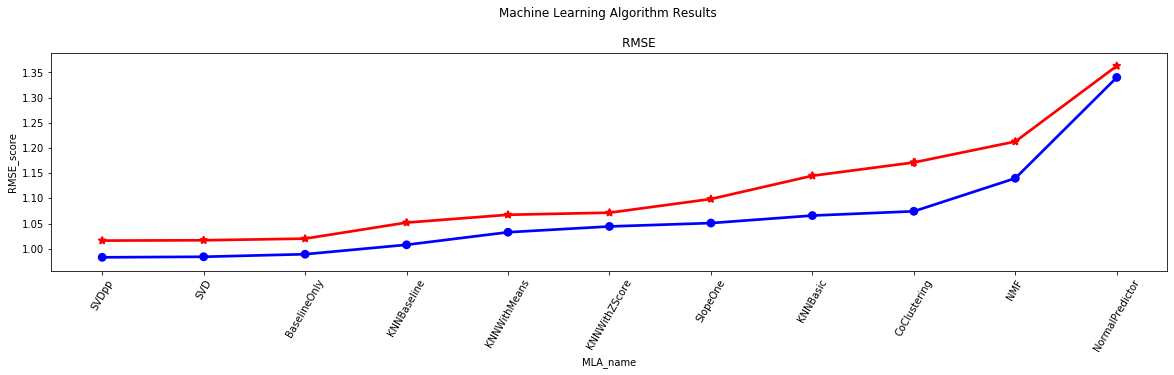

In [115]:
plt.figure(figsize=(20,4))
sns.pointplot(y='RMSE', x ='MLA_Name', data = MLA_compare_item , color = 'r',markers=["*"],label = 'RMSE')
sns.pointplot(y='RMSE', x ='MLA_Name', data = MLA_compare_user , color = 'b',markers=["o"],label = 'RMSE')
plt.title('Machine Learning Algorithm Results \n\n               RMSE')
plt.xlabel('MLA_name')
plt.ylabel('RMSE_score')
plt.xticks(rotation=60)


In [0]:
##################################################################################################################################################################################################################